In [1]:
import pandas as pd
import numpy as np

In [2]:
original_df = pd.read_csv("./data/processed_movie_data.csv", delimiter=';', encoding='utf-8')
original_df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,30000000.0,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1.0,1.0,1995-10-30,373554033.0,81.0,1.0,7.7,5415.0,303,0.112121,1995,10,0,0
1,65000000.0,Adventure,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,3.0,1.0,1995-12-15,262797249.0,104.0,2.0,6.9,2413.0,395,-0.218750,1995,12,4,1
2,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0,270,0.600000,1995,12,4,2
3,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0,335,-0.053571,1995,12,4,3
4,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0,448,-0.116667,1995,12,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,2196531.0,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",0.947509,1.0,1.0,2005-12-30,2411594.0,107.0,1.0,5.6,10.0,669,0.102083,2005,12,4,2
4681,12000000.0,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,1.323587,1.0,1.0,2007-06-14,19000000.0,185.0,2.0,6.9,25.0,117,-0.055556,2007,6,3,3
4682,800000.0,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",0.903061,0.0,0.0,2006-11-23,1328612.0,100.0,1.0,5.8,6.0,378,0.380000,2006,11,3,2
4683,2000000.0,Romance,tt1718881,Про любоff,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,1.0,1.0,2010-09-30,1268793.0,107.0,1.0,4.0,3.0,534,0.000000,2010,9,3,9


In [3]:
original_df = original_df[original_df['genres'].isin(["Action", "Comedy", "Drama"])].copy()
original_df.reset_index(drop=True, inplace=True)
original_df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0,270,0.600000,1995,12,4,2
1,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0,335,-0.053571,1995,12,4,3
2,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0,448,-0.116667,1995,12,4,3
3,62000000.0,Comedy,tt0112346,The American President,"Widowed U.S. president Andrew Shepherd, one of...",6.318445,2.0,1.0,1995-11-17,107879496.0,106.0,1.0,6.5,199.0,269,0.320000,1995,11,4,2
4,98000000.0,Action,tt0112760,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,4.0,4.0,1995-12-22,10017322.0,119.0,2.0,5.7,137.0,383,-0.128571,1995,12,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2000000.0,Comedy,tt1820462,Beremennyy,The main character of the film Sergey Dobrolyu...,0.397106,0.0,1.0,2011-07-21,8000000.0,81.0,1.0,3.1,7.0,922,0.086435,2011,7,3,2
2922,2196531.0,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",0.947509,1.0,1.0,2005-12-30,2411594.0,107.0,1.0,5.6,10.0,669,0.102083,2005,12,4,2
2923,12000000.0,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,1.323587,1.0,1.0,2007-06-14,19000000.0,185.0,2.0,6.9,25.0,117,-0.055556,2007,6,3,3
2924,800000.0,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",0.903061,0.0,0.0,2006-11-23,1328612.0,100.0,1.0,5.8,6.0,378,0.380000,2006,11,3,2


In [4]:
df = original_df.copy()

In [5]:
from utils.kohonen.kohonen import build_kohonen_net, _build_kohonen_net
from utils.kohonen.neuron_neighbours import prop2iters_neighbour_radius, relu_like_neighbour_radius, exp_neighbour_radius
from utils.kohonen.neuron_lr import inv2iter_learning_rate, fixed_learning_rate
from utils.kohonen.sample_pickers import stochastic_picker

In [6]:
seed = np.random.randint(0, 65000)
seed

27089

In [7]:
init_f = "sample no repos"
init_with_sample = True
picker_f = "stochastic"
neighbour_f = prop2iters_neighbour_radius
lr_f = fixed_learning_rate
grid_type = "rectangular"

In [8]:
random_state = np.random.default_rng(seed)

In [9]:
cols = ["budget", "popularity", "production_companies", 
        "production_countries", "revenue", "runtime", 
        "spoken_languages", "vote_average", "vote_count",
        "overview_length", "sentiment", "year",
        "month", "weekday"]

In [10]:
to_normalize = cols
for i in range(len(to_normalize)):
    df[to_normalize[i]] = (df[to_normalize[i]] - df[to_normalize[i]].mean()) / df[to_normalize[i]].std()
df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,-0.338627,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",-0.838685,-0.857145,-0.456935,1995-12-22,0.055390,0.705233,-0.550287,-0.182833,-0.523893,-0.214532,2.538370,-0.306167,1.446282,0.602027,2
1,0.926940,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",1.748029,0.049746,-0.456935,1995-12-15,0.832678,2.682968,0.518863,1.576938,1.162664,0.182616,-0.525639,-0.306167,1.446282,0.602027,3
2,0.207868,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,-0.586350,0.049746,-0.456935,1995-12-22,-0.070035,-0.260637,-0.550287,-0.842748,-0.396400,0.873043,-0.821436,-0.306167,1.446282,0.602027,3
3,0.984466,Comedy,tt0112346,The American President,"Widowed U.S. president Andrew Shepherd, one of...",-0.386470,-0.403700,-0.456935,1995-11-17,0.249207,-0.260637,-0.550287,0.257109,-0.373633,-0.220642,1.225702,-0.306167,1.155175,0.602027,2
4,2.019930,Action,tt0112760,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",-0.208811,0.503191,3.475392,1995-12-22,-0.468510,0.337283,0.518863,-0.622776,-0.430095,0.475895,-0.877247,-0.306167,1.446282,0.602027,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,-0.741307,Comedy,tt1820462,Beremennyy,The main character of the film Sergey Dobrolyu...,-1.475438,-1.310590,-0.456935,2011-07-21,-0.483305,-1.410483,-0.550287,-3.482404,-0.548481,3.769169,0.130725,0.712490,-0.009253,-0.155621,2
2922,-0.735654,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",-1.374216,-0.857145,-0.456935,2005-12-30,-0.524290,-0.214643,-0.550287,-0.732762,-0.545749,2.223346,0.204086,0.330493,1.446282,0.602027,2
2923,-0.453678,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,-1.305053,-0.857145,-0.456935,2007-06-14,-0.402632,3.372876,0.518863,0.697052,-0.532089,-1.149357,-0.534941,0.457826,-0.300359,-0.155621,3
2924,-0.775822,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",-1.382390,-1.310590,-1.767711,2006-11-23,-0.532233,-0.536600,-0.550287,-0.512790,-0.549392,0.445345,1.506988,0.394160,1.155175,-0.155621,2


In [11]:
drama_df = df[df["genres"] == "Drama"]
comedy_df = df[df["genres"] == "Comedy"]
action_df = df[df["genres"] == "Action"]
drama_df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
5,0.696837,Drama,tt0112641,Casino,The life of the gambling paradise – Las Vegas ...,0.315856,0.503191,0.853841,1995-11-22,0.309587,3.050919,-0.550287,1.686924,0.668171,-1.387646,-0.977706,-0.306167,1.155175,-0.913268,4
6,-0.324245,Drama,tt0114388,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",0.414389,-0.403700,0.853841,1995-12-13,0.448108,1.119178,-0.550287,1.027009,-0.223373,-1.008828,-0.186589,-0.306167,1.446282,-0.913268,4
10,-0.695286,Drama,tt0113627,Leaving Las Vegas,"Ben Sanderson, an alcoholic Hollywood screenwr...",0.351651,-0.403700,-0.456935,1995-10-27,-0.176746,0.015326,-0.550287,0.917024,-0.222462,-0.410051,-1.446516,-0.306167,0.864068,0.602027,4
12,-0.482441,Drama,tt0112818,Dead Man Walking,A justice drama based on a true story about a ...,-0.281115,0.049746,0.853841,1995-12-29,-0.253285,0.475264,-0.550287,1.136995,-0.236122,0.115407,1.509592,-0.306167,1.446282,0.602027,4
14,-0.511204,Drama,tt0113347,How To Make An American Quilt,Soon-to-be-wed graduate student Finn Dodd deve...,-0.723475,-0.403700,-0.456935,1995-10-06,-0.369085,0.199301,-0.550287,0.257109,-0.520251,0.873043,0.612900,-0.306167,0.864068,0.602027,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,-0.585987,Drama,tt0449999,कभी अलविदा ना कहना,Dev and Maya are both married to different peo...,-1.112148,-0.403700,-0.456935,2006-08-11,-0.417299,3.740826,0.518863,-0.182833,-0.513876,-0.232862,0.936602,0.394160,0.281854,0.602027,4
2905,-0.698163,Drama,tt4643432,Dans les forêts de Sibérie,"Fed up with the hectic, senseless world he liv...",-1.303143,-0.857145,-0.456935,2016-06-15,-0.531031,-0.306631,1.588014,1.136995,-0.523893,1.978947,-0.534734,1.030820,-0.300359,-0.913268,4
2906,-0.770070,Drama,tt0431461,Waltzing Anna,Dr. Charlie Keegan is ordered to serve 6 month...,-1.487224,-1.310590,-1.767711,2006-08-11,-0.541893,-0.168649,-1.619438,0.807038,-0.553945,0.280376,0.763589,0.394160,0.281854,0.602027,4
2916,-0.597492,Drama,tt3266724,Black Rose,A Russian Police Major is enlisted by the LAPD...,-1.091872,-0.403700,-0.456935,2014-04-17,-0.535703,-1.318495,0.518863,-4.692247,-0.549392,-0.715549,-1.352754,0.903488,-0.882573,-0.155621,4


In [12]:
drama_df = drama_df[cols]
comedy_df = comedy_df[cols]
action_df = action_df[cols]
drama_df.sample(replace=False)

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday
1138,-0.712544,0.234885,-0.4037,0.853841,-0.468637,3.418869,-0.550287,1.466952,-0.408239,0.506445,-0.333092,-2.470813,1.446282,0.602027


In [13]:
def special_weight_init(X: np.ndarray, k: int, 
                        random_state: np.random.Generator = None) -> np.ndarray:
    n = X.shape[1]
    neuron_weights = np.zeros((k, k, n))

    if random_state is None:
        random_state = np.random.default_rng()

    for i in range(k):
        for j in range(k):
            if i > k/2:
                neuron_weights[i, j] = random_state.choice(drama_df.to_numpy())
            elif j > k/2:
                neuron_weights[i, j] = random_state.choice(comedy_df.to_numpy())
            else:
                neuron_weights[i, j] = random_state.choice(action_df.to_numpy())

    return neuron_weights
    
    

In [14]:
kohonen_net = _build_kohonen_net(df[cols].to_numpy(), cols, 10, len(cols)*500, 
                                lambda X, k : special_weight_init(X, k, random_state), lambda X, k: stochastic_picker(X, k, random_state), 
                                neighbour_f, lr_f, 
                                grid_type, True, len(cols)*10)

In [15]:
import matplotlib.pyplot as plt

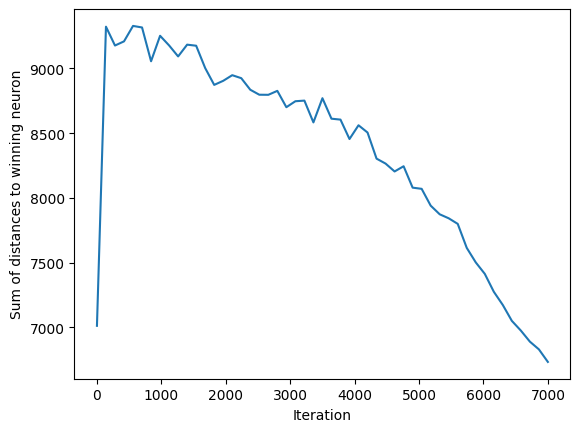

In [16]:
x_sum_dists = [t[0] for t in kohonen_net.sum_dists]
y_sum_dists = [t[1] for t in kohonen_net.sum_dists]
plt.xlabel("Iteration")
plt.ylabel("Sum of distances to winning neuron")
plt.plot(x_sum_dists, y_sum_dists)

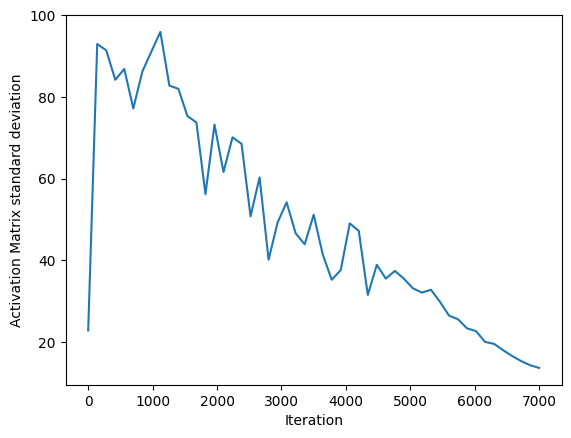

In [17]:
x_act_mat_sigmas = [t[0] for t in kohonen_net.act_mat_sigmas]
y_act_mat_sigmas = [t[1] for t in kohonen_net.act_mat_sigmas]
x_act_mat_sigmas = np.array(x_act_mat_sigmas)
y_act_mat_sigmas = np.array(y_act_mat_sigmas)
plt.xlabel("Iteration")
plt.ylabel("Activation Matrix standard deviation")
plt.plot(x_act_mat_sigmas, y_act_mat_sigmas)

In [18]:
act_mat = kohonen_net.activations_mat(df)
act_mat

array([[57, 57, 37, 30, 35, 37, 23, 41, 24, 45],
       [19, 16, 15, 17, 19, 15, 16, 13,  8, 31],
       [28,  5, 17, 19, 29, 26, 22, 29, 26, 23],
       [24,  8, 13, 18, 16, 22, 22, 32, 15, 35],
       [40, 20, 18,  9, 18, 20, 33, 34, 24, 52],
       [28, 27, 35, 33, 17, 23, 30, 30, 44, 37],
       [21, 15, 17, 26, 44, 40, 30, 53, 26, 42],
       [22, 14, 17, 22, 10, 21, 38, 22, 46, 47],
       [16, 17, 42, 41, 34, 36, 38, 53, 22, 31],
       [41, 21, 18, 52, 40, 48, 64, 59, 63, 61]])

In [19]:
act_map = kohonen_net.activations_map(df)
act_map

{(0, 1): [0,
  3,
  12,
  20,
  37,
  49,
  58,
  64,
  218,
  243,
  254,
  316,
  333,
  342,
  396,
  408,
  463,
  534,
  553,
  571,
  580,
  600,
  681,
  749,
  802,
  831,
  837,
  903,
  910,
  926,
  1049,
  1061,
  1189,
  1300,
  1323,
  1325,
  1329,
  1336,
  1354,
  1358,
  1420,
  1449,
  1505,
  1543,
  1554,
  1582,
  1633,
  1683,
  2024,
  2030,
  2072,
  2320,
  2417,
  2671,
  2727,
  2728,
  2889],
 (9, 3): [1,
  34,
  85,
  109,
  145,
  216,
  236,
  312,
  325,
  429,
  506,
  520,
  522,
  523,
  546,
  566,
  744,
  921,
  1162,
  1419,
  1462,
  1609,
  1610,
  1657,
  1677,
  1720,
  1837,
  1921,
  1927,
  1942,
  2033,
  2143,
  2165,
  2290,
  2302,
  2310,
  2391,
  2398,
  2405,
  2426,
  2490,
  2520,
  2530,
  2603,
  2638,
  2650,
  2652,
  2658,
  2683,
  2709,
  2721,
  2831],
 (9, 8): [2,
  23,
  45,
  73,
  100,
  106,
  120,
  193,
  197,
  263,
  303,
  384,
  411,
  416,
  446,
  484,
  503,
  512,
  554,
  555,
  575,
  596,
  599,
  669,
 

In [20]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

display(df.iloc[act_map[(0,0)]])

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
46,0.495497,Drama,tt0114436,Showgirls,A young drifter named Nomi arrives in Las Vega...,1.670319,0.049746,0.853841,1995-09-22,-0.392725,0.751227,-0.550287,-1.502662,-0.317172,-1.008828,1.131940,-0.306167,0.572961,0.602027,4
118,-0.223575,Comedy,tt0107977,Robin Hood: Men in Tights,Robin Hood comes home after fighting in the Cr...,1.603064,0.049746,0.853841,1993-07-28,-0.279863,-0.352625,-0.550287,0.147124,-0.031222,-0.104552,2.538370,-0.433499,-0.009253,-0.913268,2
283,0.207868,Drama,tt0118623,Anna Karenina,Anna (Marceau) is a wife and mother who has an...,-0.507408,0.049746,-0.456935,1997-04-04,-0.536170,-0.168649,-0.550287,0.147124,-0.531179,-1.106587,2.069560,-0.178835,-0.882573,0.602027,4
343,-0.655018,Comedy,tt0120777,The Opposite of Sex,A 16-year-old girl visits her gay half-brother...,1.161313,-1.310590,-0.456935,1998-05-22,-0.498859,-0.306631,-0.550287,-0.402805,-0.503859,-1.100477,1.678885,-0.115169,-0.591466,0.602027,2
892,1.358383,Action,tt0219965,Bandits,Two bank robbers fall in love with the girl th...,0.867463,1.863527,-0.456935,2001-10-12,-0.045967,0.521258,-0.550287,-0.072848,-0.275281,-1.485406,2.069560,0.075829,0.864068,0.602027,3
957,-0.655018,Drama,tt0245574,Y tu mamá también,"In Mexico, two teenage boys and an attractive ...",1.019325,0.049746,-0.456935,2001-06-08,-0.295433,-0.260637,-0.550287,1.136995,-0.262532,-0.953838,0.711964,0.075829,-0.300359,0.602027,4
1010,0.064054,Action,tt0280380,Trapped,When their daughter is kidnapped by experience...,-0.485186,0.049746,0.853841,2002-09-20,-0.491249,-0.260637,-0.550287,-0.512790,-0.427363,-0.892738,2.772775,0.139495,0.572961,0.602027,3
1086,0.639311,Action,tt0264395,Basic,A DEA agent investigates the disappearance of ...,1.086481,-0.403700,-0.456935,2003-04-18,-0.228138,-0.628588,-0.550287,-0.072848,-0.290762,-0.904958,2.069560,0.203161,-0.882573,0.602027,3
1282,-0.787328,Comedy,tt0374900,Napoleon Dynamite,A listless and alienated teenager decides to h...,0.343447,1.410081,-0.456935,2004-06-11,-0.203748,-0.766569,-0.550287,0.477081,-0.038507,-0.739989,0.560235,0.266827,-0.300359,0.602027,2
1535,0.639311,Comedy,tt0393735,The Shaggy Dog,The tale of a workaholic dad-turned-dog who fi...,-0.651209,0.049746,-0.456935,2006-03-09,-0.093777,-0.628588,-0.550287,-1.942605,-0.429184,-1.057708,2.889978,0.394160,-1.173680,-0.155621,2


In [21]:
u_mat = kohonen_net.u_mat()
u_mat

array([[1.17229085, 0.98679413, 0.98574784, 0.98735121, 1.09969461,
        1.40724668, 1.87889856, 2.10969649, 1.52655229, 1.27380345],
       [1.18091578, 0.87905443, 0.91227876, 0.8630878 , 0.98394753,
        1.22261366, 1.33257945, 1.60166017, 1.24673508, 1.1109909 ],
       [1.41565793, 1.12428715, 1.09670399, 1.10231674, 1.19167735,
        1.10205153, 1.07793073, 1.2391596 , 1.15376334, 1.10468835],
       [1.46486302, 1.13360152, 1.28966452, 1.31854252, 1.27110428,
        1.07790716, 0.98998962, 1.12823613, 1.22163386, 1.23978111],
       [1.46838628, 1.27350337, 1.38654144, 1.46096417, 1.44291861,
        1.25692688, 1.04124839, 1.13328603, 1.14110094, 1.16852231],
       [1.48749978, 1.43799401, 1.57041567, 1.71511519, 1.5506528 ,
        1.28752807, 1.10217282, 1.01923019, 0.91353631, 0.91696961],
       [1.90586589, 1.49802152, 1.53080696, 1.58158824, 1.56654704,
        1.35149438, 1.12467342, 0.93499966, 0.85961833, 0.88037409],
       [2.5714852 , 1.93683875, 1.5187628

In [22]:
from utils.kohonen.plots import plot_u_mat, plot_mat

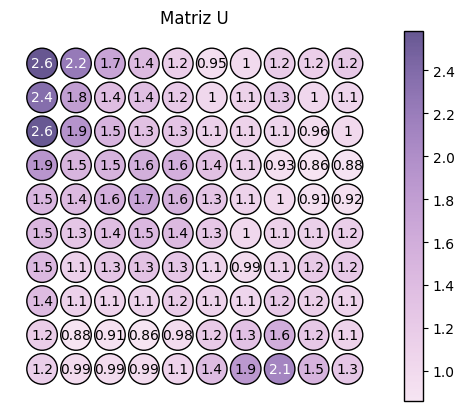

In [23]:
plot_u_mat(kohonen_net, u_mat)

In [24]:
kohonen_net.neuron_weights

array([[[-1.45930022e-01,  2.80703525e-01,  3.90371848e-01, ...,
          4.34840969e-01,  2.71275206e-01,  6.82119939e-01],
        [-2.44566422e-01, -7.28307943e-02, -2.05279830e-01, ...,
          5.86122262e-02,  6.35577062e-01,  5.35422519e-01],
        [-4.17941503e-01, -5.22820784e-01, -5.95649254e-01, ...,
         -4.25166803e-03,  5.92259806e-01,  5.91935292e-01],
        ...,
        [-4.07011522e-01, -3.79416774e-02, -3.77438411e-01, ...,
         -1.75238887e+00,  2.56083202e-01,  8.18805322e-02],
        [-5.59595276e-01, -4.43024146e-02, -5.20850433e-01, ...,
         -2.38352535e+00,  5.86309426e-02, -8.61661281e-01],
        [-6.31468009e-01, -5.58802882e-02, -5.88855597e-01, ...,
         -2.78321330e+00,  2.12793304e-01, -1.11227119e+00]],

       [[-2.11661207e-01, -2.39715114e-01, -6.43842261e-02, ...,
          4.08891461e-01,  4.22897420e-01,  2.80245939e-01],
        [-2.54151521e-01, -2.66941118e-01, -2.72941798e-01, ...,
          1.32818180e-01,  2.21179203e

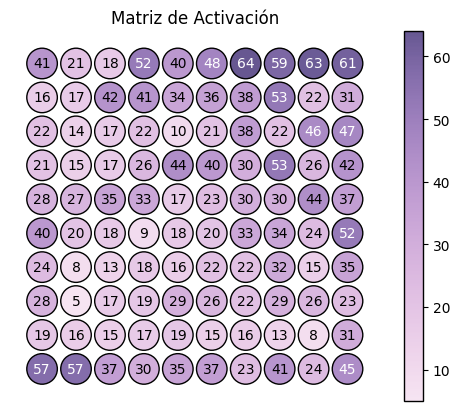

In [25]:
plot_mat(kohonen_net, act_mat, "Matriz de Activación")

In [26]:
kohonen_net.init_neuron_weights

array([[[ 3.80322846,  3.8046873 ,  0.0497457 , ...,  0.64882376,
         -0.00925254, -0.91326821],
        [-0.51120385, -1.05867293, -0.85714473, ..., -0.87916174,
          1.15517487,  0.60202682],
        [-0.64351311,  1.32781888,  0.0497457 , ..., -2.08881693,
         -0.30035939, -0.1556207 ],
        ...,
        [ 0.06405379,  0.43736299, -0.40369952, ...,  0.39415951,
          0.57296116,  1.35967433],
        [-0.68378114,  0.77803989, -0.40369952, ..., -1.19749205,
          1.15517487,  0.60202682],
        [-0.42491521, -1.3099676 , -0.40369952, ..., -0.24250112,
         -0.8825731 , -0.91326821]],

       [[ 1.07075466,  1.78177196,  1.86352656, ...,  0.39415951,
          1.44628172,  1.35967433],
        [ 3.22797081,  2.00524941, -0.40369952, ...,  0.71248982,
         -0.00925254,  0.60202682],
        [-0.53996673, -0.61530216, -0.85714473, ...,  0.5851577 ,
         -1.17367995, -1.67091572],
        ...,
        [-0.56872962, -0.57006797,  0.0497457 , ...,  

In [27]:
kohonen_net.neuron_positions[0,0]

array([0., 0.])

In [28]:
from utils.distance import euclidean_distance

if init_with_sample:
    init_sample = dict()
    sample_to_neu = dict()

    for idx, sample in df.iterrows():
        sample_df = sample.to_frame().T
        X_p = sample_df[cols].to_numpy().astype(float)
        for i in range(kohonen_net.k):
            for j in range(kohonen_net.k):
                dist = euclidean_distance(np.reshape(X_p, (X_p.size,)), np.reshape(kohonen_net.init_neuron_weights[i, j], (X_p.size,)))
                if dist <= np.finfo(float).eps:
                    init_sample[(i, j)] = idx
                    sample_to_neu[idx] = (i, j)

    display(init_sample)

{(6, 1): 6,
 (7, 8): 38,
 (0, 9): 134,
 (1, 3): 195,
 (7, 2): 323,
 (5, 7): 325,
 (9, 7): 358,
 (9, 2): 387,
 (5, 8): 410,
 (5, 9): 410,
 (2, 2): 415,
 (0, 1): 441,
 (7, 7): 446,
 (4, 7): 458,
 (8, 6): 482,
 (0, 6): 517,
 (0, 3): 547,
 (6, 3): 558,
 (0, 2): 564,
 (3, 8): 599,
 (7, 9): 625,
 (2, 1): 657,
 (8, 2): 666,
 (7, 3): 679,
 (0, 8): 702,
 (1, 5): 730,
 (0, 5): 738,
 (3, 3): 777,
 (1, 4): 793,
 (4, 4): 829,
 (3, 7): 836,
 (5, 4): 863,
 (6, 9): 959,
 (4, 3): 1009,
 (9, 0): 1021,
 (6, 7): 1037,
 (6, 4): 1038,
 (7, 6): 1038,
 (1, 6): 1164,
 (3, 0): 1203,
 (7, 4): 1212,
 (8, 1): 1215,
 (2, 4): 1241,
 (8, 8): 1250,
 (5, 3): 1288,
 (3, 5): 1356,
 (2, 9): 1363,
 (4, 1): 1368,
 (3, 2): 1374,
 (1, 8): 1385,
 (8, 5): 1386,
 (4, 6): 1505,
 (9, 8): 1533,
 (1, 7): 1565,
 (0, 7): 1573,
 (8, 7): 1597,
 (1, 0): 1652,
 (2, 6): 1715,
 (8, 3): 1719,
 (6, 6): 1760,
 (8, 4): 1779,
 (5, 0): 1799,
 (5, 6): 1882,
 (4, 2): 1884,
 (4, 9): 1895,
 (1, 2): 1933,
 (3, 9): 1991,
 (8, 9): 2007,
 (0, 4): 2010,
 

In [29]:
if init_with_sample:
    init_sample_vals = list(init_sample.values())
    display(original_df.iloc[init_sample_vals])

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
6,16500000.0,Drama,tt0114388,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",10.673167,2.0,2.0,1995-12-13,135000000.0,136.0,1.0,7.2,364.0,140,0.018750,1995,12,2,4
38,27000000.0,Drama,tt0112857,Devil in a Blue Dress,"In late 1940s Los Angeles, Easy Rawlins is an ...",4.646132,2.0,1.0,1995-09-15,16140822.0,102.0,1.0,6.3,88.0,442,0.022222,1995,9,4,4
134,13000000.0,Comedy,tt0116269,Faithful,A depressed housewife whose husband is having ...,1.296862,2.0,1.0,1996-04-03,9789900.0,91.0,1.0,4.8,4.0,151,0.000000,1996,4,2,2
195,67000000.0,Action,tt0116830,Last Man Standing,John Smith is a mysterious stranger who is dra...,11.845918,2.0,1.0,1996-09-20,47267001.0,101.0,1.0,6.2,263.0,310,-0.214286,1996,9,4,3
323,80000000.0,Drama,tt0119925,The Postman,"In 2013 there are no highways, no I-ways, no d...",6.537407,2.0,1.0,1997-12-25,17626234.0,177.0,2.0,6.1,306.0,293,0.200000,1997,12,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,20000000.0,Action,tt3231054,Risen,Follows the epic Biblical story of the Resurre...,8.759801,4.0,1.0,2016-02-19,46069568.0,107.0,1.0,5.7,300.0,352,0.075000,2016,2,4,3
2751,1300000.0,Action,tt0415003,Garv: Pride and Honour,Garv is a story of three brave and honest cops...,0.386315,0.0,1.0,2004-07-09,11000000.0,162.0,1.0,4.5,4.0,874,0.055000,2004,7,4,3
2763,60720000.0,Comedy,tt4701660,美人鱼,"A playboy business tycoon, Liu Xuan, purchases...",5.296052,1.0,1.0,2016-02-08,553810228.0,93.0,1.0,6.2,76.0,436,0.000000,2016,2,0,2
2777,700000.0,Drama,tt4129870,White Girl,"Summer, New York City. A college girl falls ha...",6.021721,4.0,1.0,2016-09-02,200242.0,88.0,1.0,5.5,109.0,153,-0.111061,2016,9,4,4


In [30]:
from utils.pca import pca, plot_pca
import seaborn as sns

In [31]:
pca_data = pca(original_df, cols)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pauli/Git/unsupervised-learning/utils/pca.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_data.xs[i], pca_data.ys[i], s=200, label=varnames, c=colors[i])


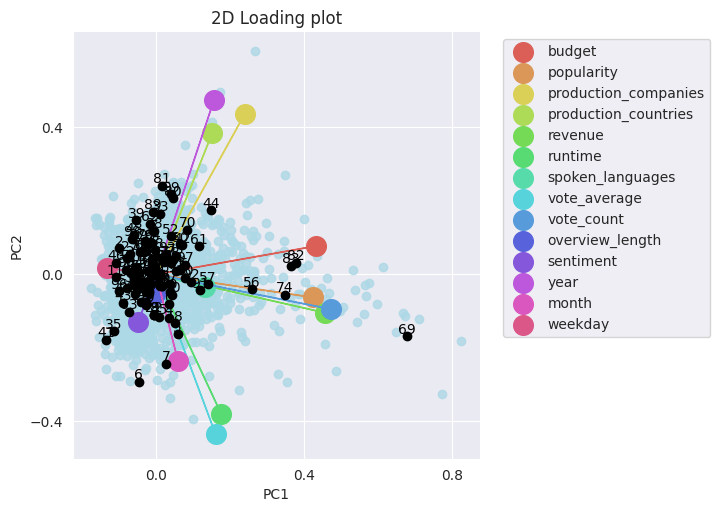

In [32]:
if init_with_sample:
    data = pca_data.pca_df_scaled.iloc[init_sample_vals].to_numpy()
    sns.set_style("darkgrid")
    plot_pca(pca_data)
    plt.scatter(data[:,0], data[:, 1], color="k")
    for i in range(data.shape[0]):
        plt.annotate("{}".format(i), xy=(data[i, 0], data[i, 1]), 
                    textcoords="data", ha="center", va="bottom", color="k")

In [33]:
if init_with_sample:
    vals_dict = dict()
    vals_dict["Neuron"] = []
    for i in range(len(init_sample_vals)):
        vals_dict["Neuron"].append(sample_to_neu[init_sample_vals[i]])
    vals_dict_df = pd.DataFrame(data=vals_dict)
    display(vals_dict_df)

,Neuron
0,"(6, 1)"
1,"(7, 8)"
2,"(0, 9)"
3,"(1, 3)"
4,"(7, 2)"
...,...
95,"(5, 1)"
96,"(2, 0)"
97,"(2, 8)"
98,"(9, 9)"


In [34]:
drama_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
action_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
comedy_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        count_genres = dict()
        count_genres["Drama"] = 0
        count_genres["Action"] = 0
        count_genres["Comedy"] = 0
        if curr_neu in act_map:
            for idx, sample in df.iloc[act_map[curr_neu]].iterrows():
                count_genres[sample["genres"]] += 1
        drama_mat[i, j] = count_genres["Drama"]
        action_mat[i, j] = count_genres["Action"]
        comedy_mat[i, j] = count_genres["Comedy"]

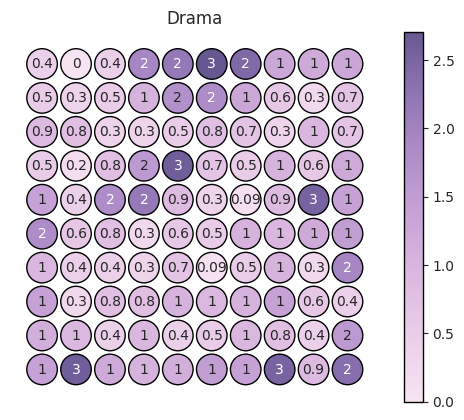

In [35]:
drama_rel_mat = drama_mat * 100 / drama_mat.sum()
plot_mat(kohonen_net, drama_rel_mat, "Drama", "{:.1g}")

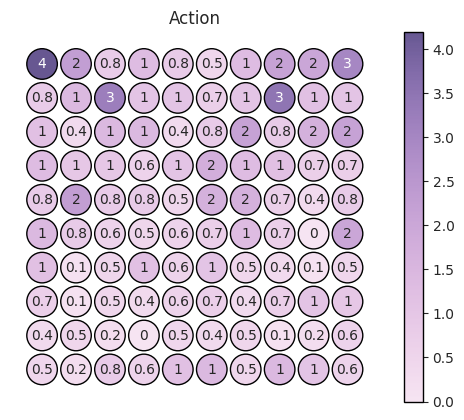

In [36]:
action_rel_mat = action_mat * 100 / action_mat.sum()
plot_mat(kohonen_net, action_rel_mat, "Action", "{:.1g}")

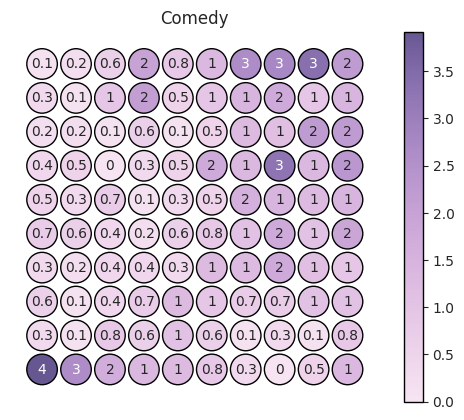

In [37]:
comedy_rel_mat = comedy_mat * 100 / comedy_mat.sum()
plot_mat(kohonen_net, comedy_rel_mat, "Comedy", "{:.1g}")

In [38]:
decision_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        index = np.argmax([drama_rel_mat[i, j], action_rel_mat[i, j], comedy_rel_mat[i, j]])
        decision_mat[i, j] = index

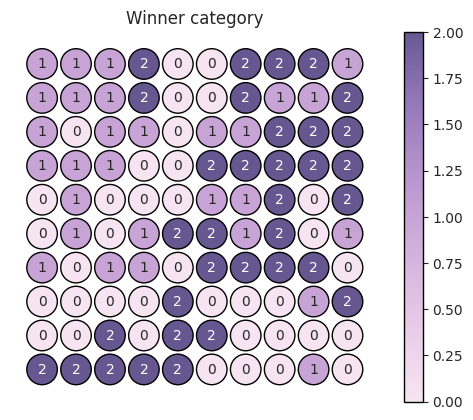

In [39]:
plot_mat(kohonen_net, decision_mat, "Winner category")

In [40]:
cat_dict = {
    "Category" : ["Drama", "Action", "Comedy"]
}
cat_df = pd.DataFrame(data=cat_dict)
cat_df

,Category
0,Drama
1,Action
2,Comedy


In [41]:
from confusion_matrix import calculate_confusion_matrix, calculate_relative_confusion_matrix, calculate_per_label_confusion_matrix, metrics
from plotter import plot_confusion_matrix

In [42]:
prediction_dict = dict()
expected_dict = dict()
for idx, pred in (df[cols].apply(kohonen_net.predict, axis=1)).items():
    prediction = cat_df.iloc[decision_mat[pred[0], pred[1]]].get(0)
    prediction_dict[idx] = prediction
    expected_dict[idx] = df.iloc[idx]["genres"]

In [43]:
rel_conf_mat = calculate_relative_confusion_matrix(np.array(["Comedy", "Action", "Drama"]), prediction_dict, expected_dict)
rel_conf_mat

,Comedy,Action,Drama
Comedy,0.591534,0.200000,0.208466
Action,0.320958,0.461078,0.217964
Drama,0.326353,0.164921,0.508726


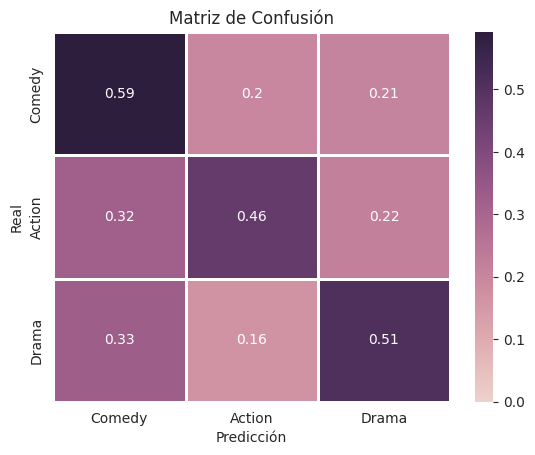

In [44]:
plot_confusion_matrix(rel_conf_mat, "Matriz de Confusión", format=".2g")

In [45]:
per_label_conf_mat = calculate_per_label_confusion_matrix(np.array(["Comedy", "Action", "Drama"]), prediction_dict, expected_dict)

In [46]:
metrics(per_label_conf_mat)

{'Comedy': {'TP': 559.0,
  'FP': 642.0,
  'FN': 386.0,
  'TN': 1339.0,
  'Precision': 0.46544546211490423,
  'Recall': 0.5915343915343916,
  'F1 Score': 0.5209692451071761,
  'Accuracy': 0.6486671223513328},
 'Action': {'TP': 385.0,
  'FP': 378.0,
  'FN': 450.0,
  'TN': 1713.0,
  'Precision': 0.5045871559633027,
  'Recall': 0.46107784431137727,
  'F1 Score': 0.4818523153942428,
  'Accuracy': 0.7170198222829802},
 'Drama': {'TP': 583.0,
  'FP': 379.0,
  'FN': 563.0,
  'TN': 1401.0,
  'Precision': 0.606029106029106,
  'Recall': 0.5087260034904014,
  'F1 Score': 0.5531309297912713,
  'Accuracy': 0.6780587833219412}}

In [47]:
production_comp_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=float)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        cell_sum = 0
        cell_count = 0
        if curr_neu in act_map:
            for idx, sample in original_df.iloc[act_map[curr_neu]].iterrows():
                cell_sum += sample["production_companies"]
                cell_count += 1
        if cell_count != 0:
            production_comp_mat[i, j] = cell_sum / cell_count

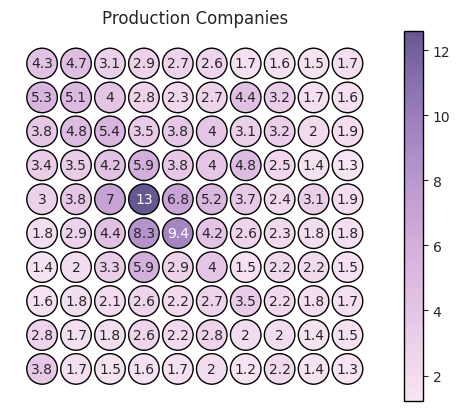

In [48]:
plot_mat(kohonen_net, production_comp_mat, "Production Companies", "{:.2g}")

In [49]:
year_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        cell_sum = 0
        cell_count = 0
        if curr_neu in act_map:
            for idx, sample in original_df.iloc[act_map[curr_neu]].iterrows():
                cell_sum += sample["year"]
                cell_count += 1
        if cell_count != 0:
            year_mat[i, j] = cell_sum / cell_count

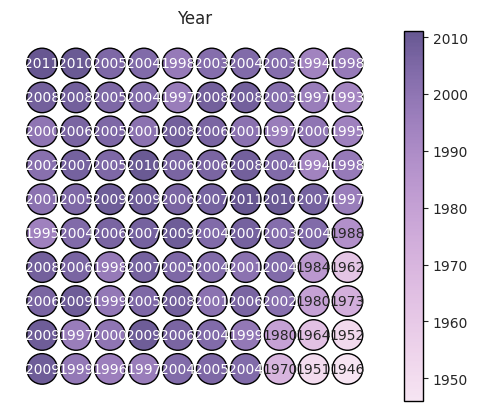

In [50]:
plot_mat(kohonen_net, year_mat, "Year")

In [51]:
popularity_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=float)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        cell_sum = 0
        cell_count = 0
        if curr_neu in act_map:
            for idx, sample in original_df.iloc[act_map[curr_neu]].iterrows():
                cell_sum += sample["popularity"]
                cell_count += 1
        if cell_count != 0:
            popularity_mat[i, j] = cell_sum / cell_count

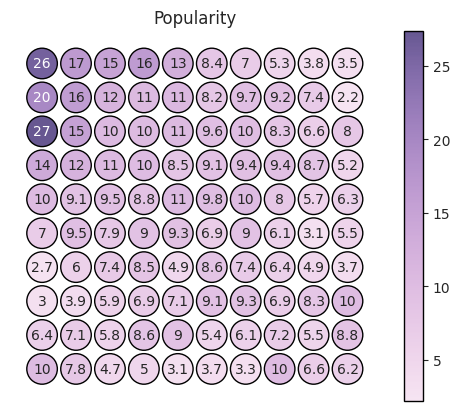

In [52]:
plot_mat(kohonen_net, popularity_mat, "Popularity", "{:.2g}")

In [53]:
revenue_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=float)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        cell_sum = 0
        cell_count = 0
        if curr_neu in act_map:
            for idx, sample in original_df.iloc[act_map[curr_neu]].iterrows():
                cell_sum += sample["revenue"]
                cell_count += 1
        if cell_count != 0:
            revenue_mat[i, j] = cell_sum / cell_count

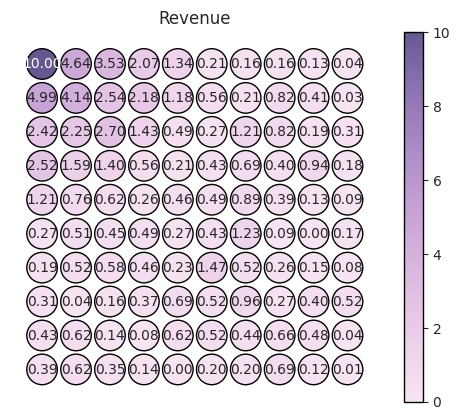

In [54]:
plot_mat(kohonen_net, (revenue_mat - revenue_mat.min()) / (revenue_mat.max() - revenue_mat.min()) * 10, "Revenue", "{:.2f}")

In [55]:
vote_count_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        cell_sum = 0
        cell_count = 0
        if curr_neu in act_map:
            for idx, sample in original_df.iloc[act_map[curr_neu]].iterrows():
                cell_sum += sample["vote_count"]
                cell_count += 1
        if cell_count != 0:
            vote_count_mat[i, j] = cell_sum / cell_count

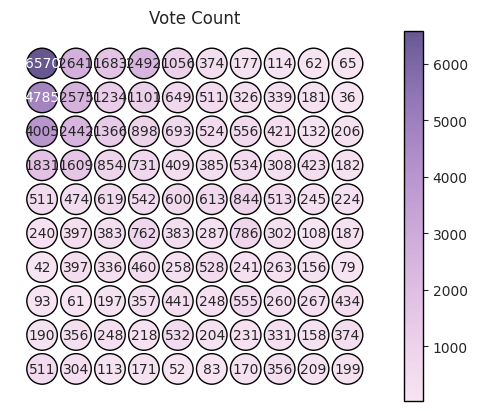

In [56]:
plot_mat(kohonen_net, vote_count_mat, "Vote Count")